In [1]:
!pip install libsvm -q
!pip install pytablewriter -q
!pip install piq -q

# Python | Peak Signal-to-Noise Ratio (PSNR)



Peak signal-to-noise ratio (PSNR) is the ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. To estimate the PSNR of an image, it is necessary to compare that image to an ideal clean image with the maximum possible power.

PSNR is defined as follows:

$PSNR = 10 \log_{10}(\frac{(L-1)^{2}}{MSE}) = 20 \log_{10}(\frac{L-1}{RMSE})$

Here, $L$ is the number of maximum possible intensity levels (minimum intensity level suppose to be 0) in an image.

$MSE$ is the mean squared error & it is defined as:

$MSE = \frac{1}{mn} \sum_{i=0}^{m-1}\sum_{j=0}^{n-1} (O(i,j)-D(i,j)^{2}$

Where:
- $O$ represents the matrix data of original image.
- $D$ represents the matrix data of degraded image.
- $m$ represents the numbers of rows of pixels and $i$ represents the index of that row of the image. $n$ represents the number of columns of pixels and $j$ represents the index of that column of the image.

$RMSE$ is the root mean squared error.

$PSNR$ is most commonly used to estimate the efficiency of compressors, filters, etc. The larger the value of PSNR, the more efficient is a corresponding compression or filter method.


Available metrics, for measuring quality and confidence of compression algorithms:

- **PSNR**: Peak Signal-to-Noise Ratio (PNSR)
- **SSIM**: Structural Similarity (SSIM)
- **MSSSIM**: Multi-Scale Structural Similarity (MS-SSIM)
- **VIFP**: Visual Information Fidelity, pixel domain version (VIFp)
- **PSNRHVS**: Peak Signal-to-Noise Ratio taking into account Contrast Sensitivity Function (CSF) (PSNR-HVS)
- **PSNRHVSM**: Peak Signal-to-Noise Ratio taking into account Contrast Sensitivity Function (CSF) and between-coefficient contrast masking of DCT basis functions (PSNR-HVS-M)

# Code

## Imports

In [26]:
import os

import collections
from itertools import chain
import itertools
from pprint import pprint
import urllib.request as request
import pickle 

import numpy as np
import pandas as pd

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from math import log10, sqrt
import cv2 
import numpy as np 

from libsvm import svmutil
import torch
from piq import psnr, ssim

## Functions

In [3]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def compute_psnr_for_image(image_path): 
     original = cv2.imread(image_path) 
     compressed = cv2.imread(f"compressed_{image_path}", 1) 
     value = PSNR(original, compressed) 
     print(f"PSNR value is {value} dB")
     pass

def plot_complex_graphics_series(s, title = 'Comples Series'):
    fig, axs = plt.subplots(3, figsize=(10, 10))
    fig.suptitle(title)

    s.plot(kind='hist', ax = axs[0])
    s.plot(kind='kde', ax=axs[0], secondary_y=True, label = f'{title} - kde') # ax = s.plot.kde()
    axs[0].set_title(f'{title}: Hist - KDE')

    s.plot(kind='box', ax = axs[1])
    axs[1].set_title(f'{title}: Box Plot')

    s.plot(kind='bar', ax = axs[2])
    s.plot(kind='line', ax=axs[2], secondary_y=False, color = 'blue', label = f'{title} - line') 
    axs[2].set_title(f'{title}: Line - Bars')

    plt.legend()
    pass

In [4]:
def show_complexes(dataframe, attributes, graphics_kind, colors, figsize = (9, 3), path_dest = '.'):
    # attributes = ['train_loss', 'train_psnr']
    # graphics_kind = ['line', 'kde', 'box', 'bar', 'hist']
    # colors = ['blue', 'red']

    rows = list(range(len(attributes)))
    columns = list(range(len(graphics_kind)))
  
    pos = -1
    for ii, (color, k) in enumerate(zip(colors, attributes)):
        fig, axes = plt.subplots(1, len(columns), figsize = figsize)
        for jj, kind in enumerate(graphics_kind) :
            dataframe.mean()[[k]].plot(kind=kind, ax = axes[jj], color = color)
            pass
        fig.suptitle(f'Complex - {k}')
        # plt.savefig(f'/content/complex_{k}.png')
        plt.savefig(os.path.join(path_dest, f'complex_{k}.png'))
        pass
    pass

def show_complex(dataframe, attributes, graphics_kind, colors, figsize = (15, 10), path_dest = '.'):
    rows = list(range(len(attributes)))
    columns = list(range(len(graphics_kind)))

    comb_attrs_graphs = list(itertools.product(attributes, graphics_kind))
    comb_axes = list(itertools.product(rows, columns))

    rows = list(range(len(attributes)))
    columns = list(range(len(graphics_kind)))

    fig, axes = plt.subplots(len(rows), len(columns), figsize = figsize)

    for ii, (k, kind) in enumerate(comb):
        groups.mean()[[k]].plot(kind=kind, ax = axes[comb_axes[ii]])
        pass
    fig.suptitle('Complex')
    # plt.savefig('/content/complex.png')
    plt.savefig(os.path.join(path_dest, f'complex_{k}.png'))
    pass

## Analyses

In [27]:
prediction = torch.rand(3, 3, 256, 256)
target = torch.rand(3, 3, 256, 256)
ssim_index = ssim(prediction, target, data_range=1.)

ssim_index, ssim_index.item()

(tensor(0.0064), 0.0064384303987026215)

In [28]:
prediction = torch.rand(3, 3, 256, 256)
target = torch.rand(3, 3, 256, 256)

psnr_mean = psnr(prediction, target, data_range=1., reduction='mean')
psnr_per_image = psnr(prediction, target, data_range=1., reduction='none')

psnr_mean, psnr_per_image

(tensor(7.7828), tensor([7.7960, 7.7892, 7.7632]))

In [6]:
history_df = pd.read_csv('/content/history.csv')

### Group By "compression_factor", "hidden_layers"

In [7]:
groups = history_df.groupby(by = ["compression_factor", "hidden_layers"])
# groups.mean()[["train_loss", "train_psnr"]].head(5).T
groups.mean()[["train_loss", "train_psnr"]].head(5)

train_loss  train_psnr
compression_factor hidden_layers                        
16                 2                0.000005   54.573533
                   3                0.000006   53.775750
                   5                0.000014   49.568887
                   7                0.000056   44.010176
                   9                0.000125   41.036364

### Show Trend Loss(MSE) and Psnr through Compression Factor and Hidden Layers Sub-Groups

In [8]:
attributes = ['train_loss', 'train_psnr']
graphics_kind = ['line', 'kde', 'box', 'bar', 'hist']

rows = list(range(len(attributes)))
columns = list(range(len(graphics_kind)))

comb = list(itertools.product(attributes, graphics_kind))
comb_axes = list(itertools.product(rows, columns))

In [9]:
groups = history_df.groupby(by = ["compression_factor", "hidden_layers"])
groups.mean()[["train_loss", "train_psnr"]].head(5)

train_loss  train_psnr
compression_factor hidden_layers                        
16                 2                0.000005   54.573533
                   3                0.000006   53.775750
                   5                0.000014   49.568887
                   7                0.000056   44.010176
                   9                0.000125   41.036364

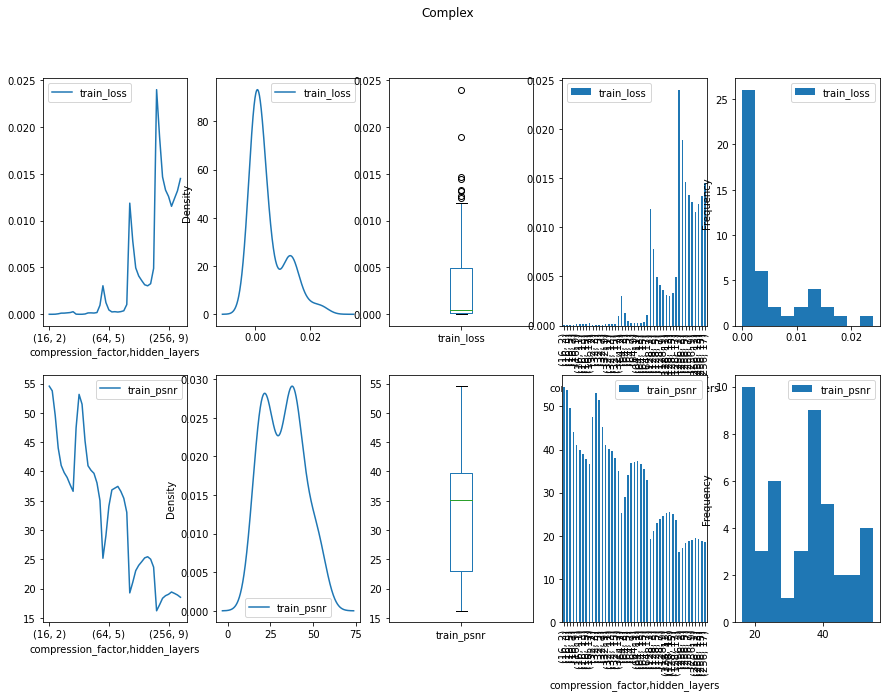

In [10]:
groups = history_df.groupby(by = ["compression_factor", "hidden_layers"])
fig, axes = plt.subplots(len(rows), len(columns), figsize = (15, 10))

for ii, (k, kind) in enumerate(comb):
    groups.mean()[[k]].plot(kind=kind, ax = axes[comb_axes[ii]])
    pass
fig.suptitle('Complex')
plt.savefig('/content/complex.png')

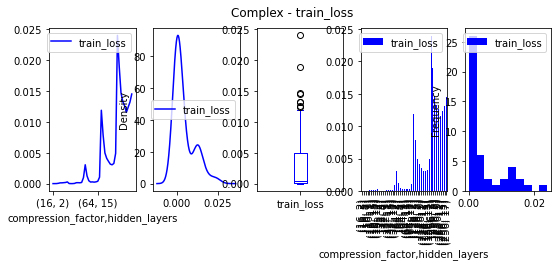

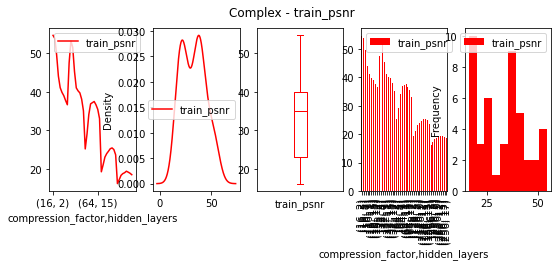

In [11]:
attributes = ['train_loss', 'train_psnr']
graphics_kind = ['line', 'kde', 'box', 'bar', 'hist']

rows = list(range(len(attributes)))
columns = list(range(len(graphics_kind)))

groups = history_df.groupby(by = ["compression_factor", "hidden_layers"])

colors = ['blue', 'red']
pos = -1
for ii, k, in enumerate(attributes):
    fig, axes = plt.subplots(1, len(columns), figsize = (9, 3))
    for jj, kind in enumerate(graphics_kind) :
        groups.mean()[[k]].plot(kind=kind, ax = axes[jj], color = colors[ii])
    fig.suptitle(f'Complex - {k}')
    plt.savefig(f'/content/complex_{k}.png')
    pass


In [12]:
group_16_2_df = groups.get_group((16, 2))[["train_loss", "train_psnr"]]

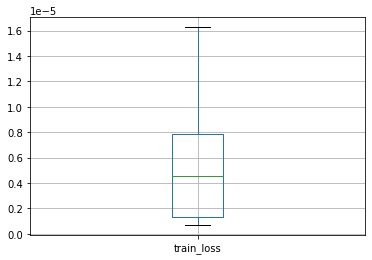

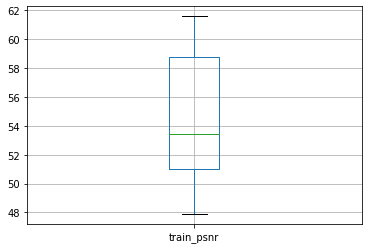

In [13]:
plt.figure()
group_16_2_df[["train_loss"]].boxplot()
plt.figure()
group_16_2_df[["train_psnr"]].boxplot()

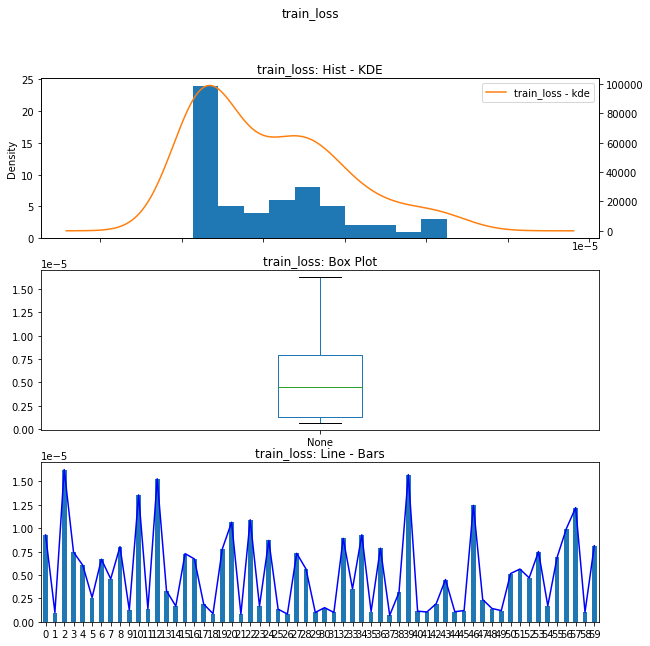

In [14]:
s = pd.Series(group_16_2_df["train_loss"].values)
plot_complex_graphics_series(s, title = 'train_loss')

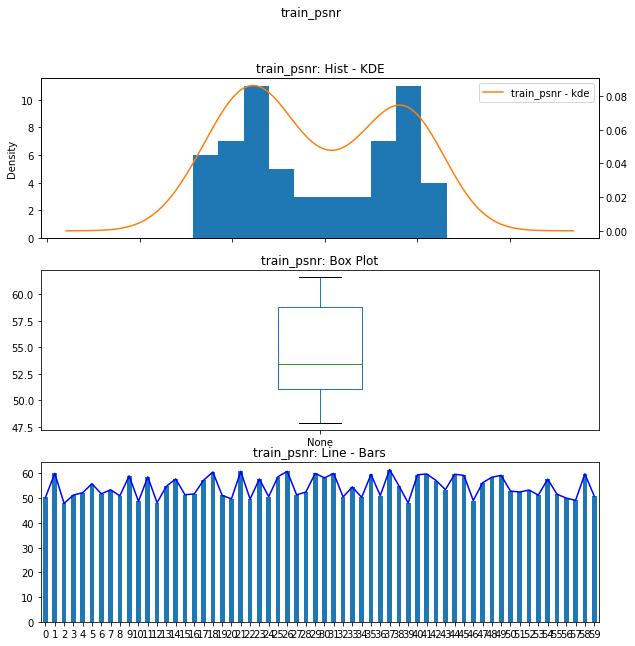

In [15]:
s = pd.Series(group_16_2_df["train_psnr"].values)
plot_complex_graphics_series(s, title = 'train_psnr')

### Group By "compression_factor"

In [16]:
groups = history_df.groupby(by = ["compression_factor"])
groups.describe()[["train_loss", "train_psnr"]].head(5).T

compression_factor           16          32   ...         128         256
train_loss count    5.400000e+02  540.000000  ...  540.000000  540.000000
           mean     1.068107e-04    0.000186  ...    0.005193    0.014997
           std      1.671382e-04    0.000889  ...    0.003078    0.004273
           min      4.230404e-07    0.000002  ...    0.001673    0.008587
           25%      1.209910e-05    0.000014  ...    0.003066    0.011895
           50%      6.406433e-05    0.000052  ...    0.004138    0.013513
           75%      1.379209e-04    0.000137  ...    0.006382    0.018300
           max      1.917885e-03    0.014314  ...    0.022868    0.032399
train_psnr count    5.400000e+02  540.000000  ...  540.000000  540.000000
           mean     4.401136e+01   43.478343  ...   23.475634   18.396932
           std      7.273982e+00    6.697687  ...    2.261632    1.139793
           min      2.717177e+01   18.442413  ...   16.407749   14.894688
           25%      3.860380e+01   38.633587  ...   21.950266   17.375601
           50%      4.193386e+01   42.857266  ...   23.832215   18.692351
           75%      4.917262e+01   48.525472  ...   25.134788   19.246471
           max      6.373618e+01   57.367047  ...   27.764874   20.661793

[16 rows x 5 columns]

In [17]:
loss = groups.mean()["train_loss"].values
psnr = groups.mean()["train_psnr"].values

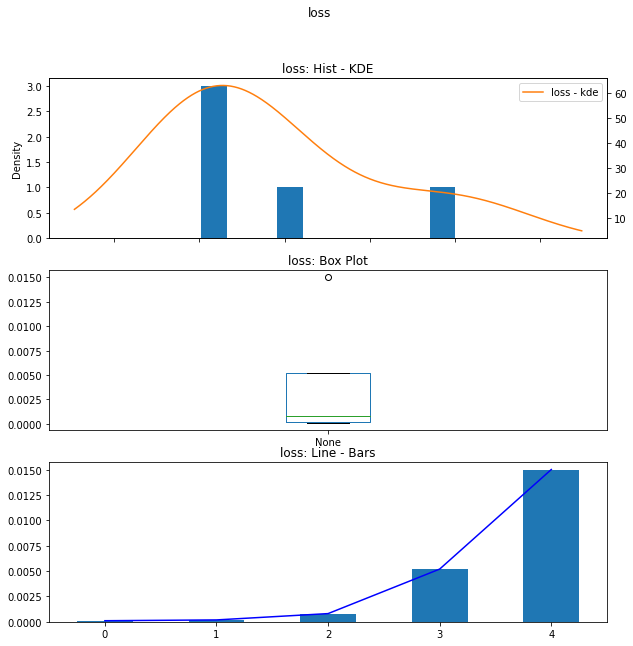

In [18]:
s = pd.Series(loss)
plot_complex_graphics_series(s, title = 'loss')

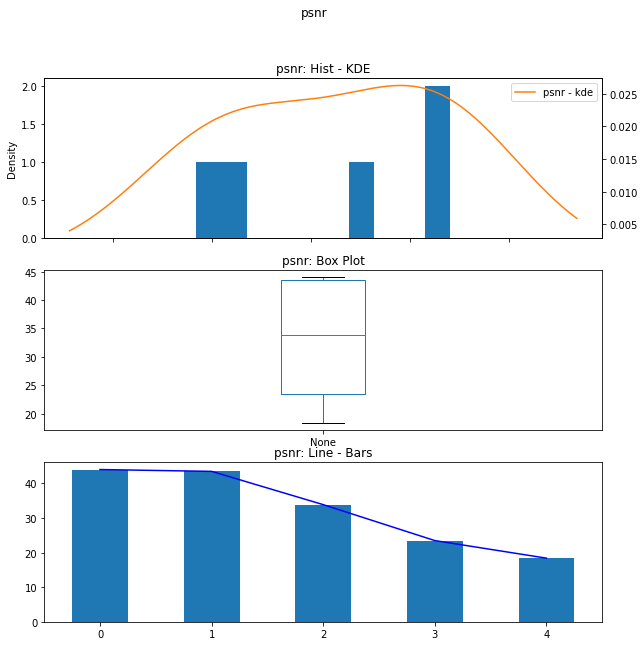

In [19]:
s = pd.Series(psnr)
plot_complex_graphics_series(s, title = 'psnr')

In [20]:
groups.get_group(16)[["hidden_layers", "train_loss"]].head(5)

,hidden_layers,train_loss
0,2,9.279130e-06
1,2,9.907611e-07
2,2,1.626578e-05
3,2,7.457875e-06
4,2,6.025635e-06


In [21]:
image_path = '/content/test001.png'
image_name = os.path.basename(image_path)
os.path.splitext(image_name)

('test001', '.png')

# References

## Papers
- Z. Wang, A.C. Bovik, H.R. Sheikh, and E.P. Simoncelli, "Image quality assessment: from error visibility to structural similarity," IEEE Transactions on Image Processing, vol. 13, no. 4, pp. 600–612, April 2004.
- Z. Wang, E.P. Simoncelli, and A.C. Bovik, "Multiscale structural similarity for image quality assessment," in IEEE Asilomar Conference on Signals, Systems and Computers, November 2003, vol. 2, pp. 1398–1402.
- H.R. Sheikh and A.C. Bovik, "Image information and visual quality," IEEE Transactions on Image Processing, vol. 15, no. 2, pp. 430-444, February 2006.
- K. Egiazarian, J. Astola, N. Ponomarenko, V. Lukin, F. Battisti, and M. Carli, "New full-reference quality metrics based on HVS," in Proceedings of the Second International Workshop on Video Processing and Quality Metrics, 2006.
- N. Ponomarenko, F. Silvestri, K. Egiazarian, M. Carli, J. Astola, and V. Lukin, "On between-coefficient contrast masking of DCT basis functions," in Proceedings of the Third International Workshop on Video Processing and Quality Metrics for Consumer Electronics, January 2007.



## Websites
- [GitHub PSNR](https://github.com/topics/psnr)
- [Automatic Image Quality Assessment in Python](https://towardsdatascience.com/automatic-image-quality-assessment-in-python-391a6be52c11)
- [Toward A Practical Perceptual Video Quality Metric](https://netflixtechblog.com/toward-a-practical-perceptual-video-quality-metric-653f208b9652)

## Third Party Libraries:
- [pytablewriter](https://pypi.org/project/pytablewriter/)
- [piq](https://pypi.org/project/piq/)
- [Kornia](https://kornia.readthedocs.io/en/latest/index.html)